In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('fraud-detection.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,0b242abb623afc578575680df30655b9,Jennifer,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,1f76529f8574734946361c461b024d99,Stephanie,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,a1a22d70485983eac12b5b88dad1cf95,Edward,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,6b849c168bdad6f867558c3793159a81,Jeremy,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,1/12/1967,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,a41d7549acf90789359a9aa5346dcb46,Tyler,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,108.0,5.350000e+01,3.132092e+01,0.000000e+00,2.675000e+01,5.350000e+01,8.025000e+01,1.070000e+02
cc_num,108.0,4.164294e+17,1.304583e+18,6.049559e+10,2.047500e+14,3.510000e+15,4.712500e+15,4.960000e+18
amt,108.0,7.929111e+01,7.253344e+01,1.820000e+00,4.275500e+01,6.023500e+01,9.455500e+01,3.416700e+02
zip,108.0,4.725331e+04,2.826934e+04,1.545000e+03,2.143800e+04,4.785050e+04,7.183325e+04,9.916000e+04
lat,108.0,3.891600e+01,5.120060e+00,2.008270e+01,3.638490e+01,3.983655e+01,4.217772e+01,4.888780e+01
long,108.0,-9.068918e+01,1.529517e+01,-1.554880e+02,-9.897010e+01,-8.724110e+01,-7.961125e+01,-6.996560e+01
city_pop,108.0,6.862706e+04,2.269826e+05,4.600000e+01,6.232500e+02,2.180000e+03,1.921175e+04,1.577385e+06
unix_time,108.0,1.325378e+09,1.443214e+03,1.325376e+09,1.325377e+09,1.325378e+09,1.325380e+09,1.325381e+09
merch_lat,108.0,3.894132e+01,5.156607e+00,1.956001e+01,3.639168e+01,3.996926e+01,4.194114e+01,4.915905e+01
merch_long,108.0,-9.078677e+01,1.527119e+01,-1.560459e+02,-9.905209e+01,-8.731201e+01,-7.915653e+01,-7.044936e+01


In [4]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
trans_num                0
first                    0
cc_num                   0
merchant                 0
category                 0
amt                      0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

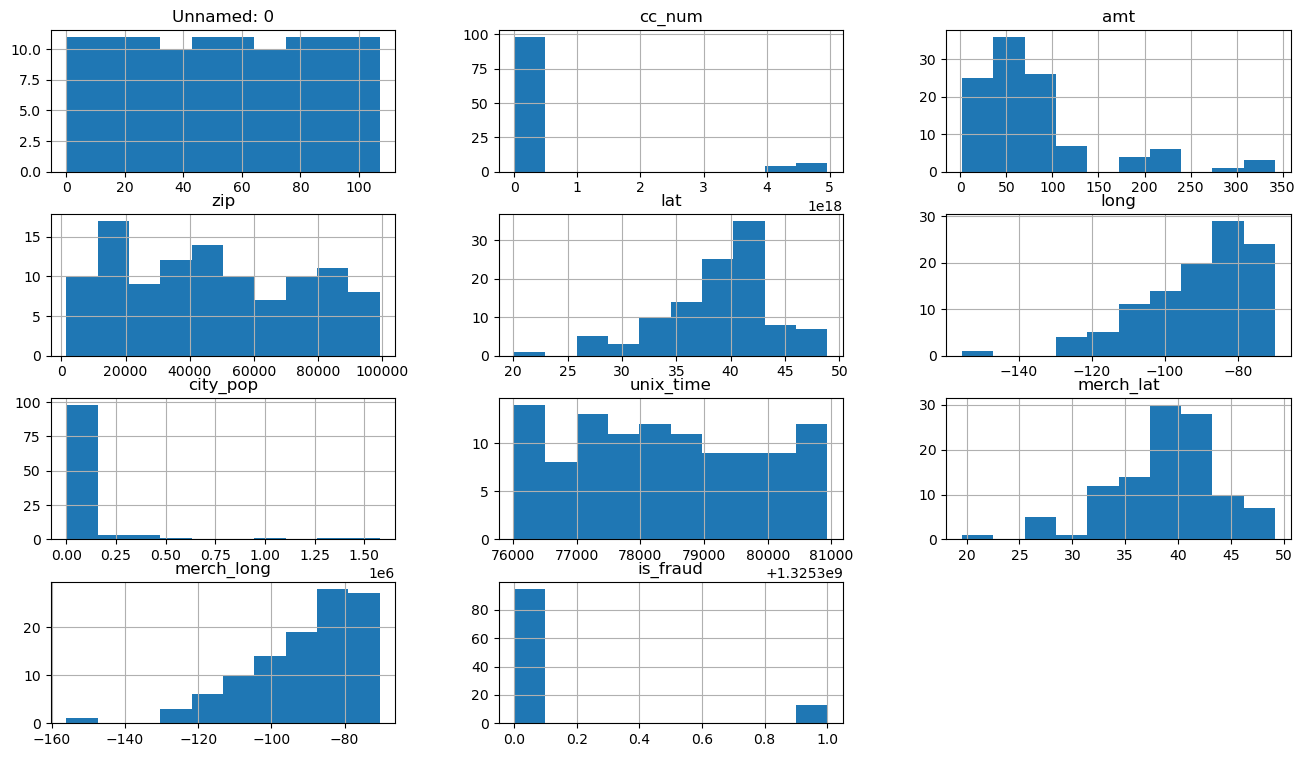

In [5]:
data.hist(figsize=(16,9))

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['trans_date_trans_time']=le.fit_transform(data['trans_date_trans_time'])
data['trans_num']=le.fit_transform(data['trans_num'])
data['first']=le.fit_transform(data['first'])
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,0,7,35,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,1325376018,36.011293,-82.048315,0
1,1,0,18,68,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,0,73,21,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,1,45,36,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,1/12/1967,1325376076,47.034331,-112.561071,0
4,4,2,74,76,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [7]:
x=data.iloc[:,1:4]
y=data.iloc[:,-1:]

In [8]:
x

,trans_date_trans_time,trans_num,first
0,0,7,35
1,0,18,68
2,0,73,21
3,1,45,36
4,2,74,76
...,...,...,...
103,62,77,52
104,62,98,57
105,63,81,51
106,64,64,12


In [9]:
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
103,0
104,0
105,0
106,0


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=43)

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="liblinear",verbose=2)
print("Training Started.....\n")
print()
log_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=log_reg.predict(xtest)
print("predicted Total Outputs\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....


[LibLinear]

Training completed....

Testing invoked
predicted Total Outputs
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 Testing is also completed....



C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.8888888888888888

Confusion Matrix:
 [[24  0]
 [ 3  0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       0.00      0.00      0.00         3

    accuracy                           0.89        27
   macro avg       0.44      0.50      0.47        27
weighted avg       0.79      0.89      0.84        27



C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)
x_resampled, y_resampled=smote.fit_resample(x,y)


In [14]:
x_resampled

,trans_date_trans_time,trans_num,first
0,0,7,35
1,0,18,68
2,0,73,21
3,1,45,36
4,2,74,76
...,...,...,...
185,52,19,17
186,43,32,14
187,12,101,43
188,41,31,26


In [15]:
y_resampled

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
185,1
186,1
187,1
188,1


In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_resampledx, y_resampledx = rus.fit_resample(x, y)

In [22]:
x_resampledx.head()

,trans_date_trans_time,trans_num,first
78,46,9,24
24,14,90,58
83,49,23,14
84,50,17,0
0,0,7,35


In [23]:
y_resampledx.head()

,is_fraud
78,0
24,0
83,0
84,0
0,0


In [24]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resampledx,y_resampledx,test_size=0.25,random_state=43)

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="liblinear",verbose=2)
print("Training Started.....\n")
print()
log_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=log_reg.predict(xtest)
print("predicted Total Outputs\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....


[LibLinear]

Training completed....

Testing invoked
predicted Total Outputs
 [1 1 1 0 1 1 1]

 Testing is also completed....



C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.14285714285714285

Confusion Matrix:
 [[0 5]
 [1 1]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.50      0.25         2

    accuracy                           0.14         7
   macro avg       0.08      0.25      0.12         7
weighted avg       0.05      0.14      0.07         7



In [29]:
xtrain.shape

(19, 3)

In [32]:
y_resampledx['is_fraud'].value_counts()

0    13
1    13
Name: is_fraud, dtype: int64

In [33]:
log_reg.classes_

array([0, 1], dtype=int64)

In [34]:
log_reg.coef_

array([[ 0.00200314,  0.02102014, -0.03211148]])

In [35]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [36]:
log_reg.dual

False

In [37]:
log_reg.feature_names_in_

array(['trans_date_trans_time', 'trans_num', 'first'], dtype=object)

In [38]:
log_reg.fit_intercept

True

In [39]:
log_reg.intercept_

array([0.29143594])

In [40]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [49]:
y_pb=log_reg.predict_proba(xtest)[:,1]
y_pb

array([0.83686918, 0.68669831, 0.82466897, 0.35358419, 0.73316999,
       0.52279998, 0.81411099])

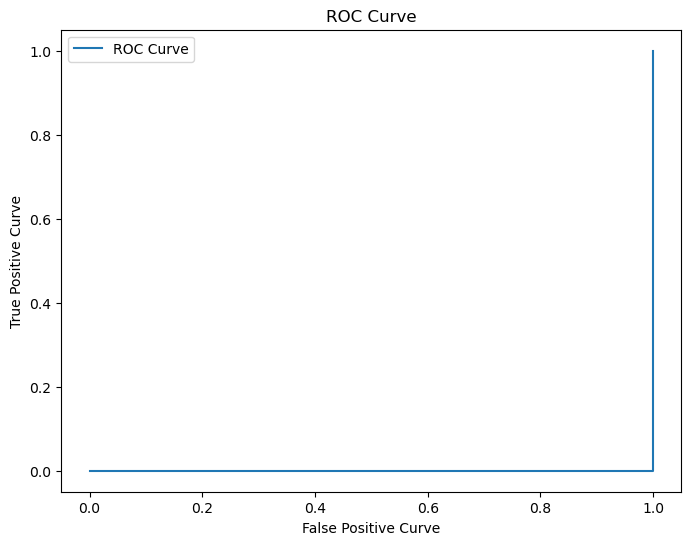

In [50]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

fpr,tpr,thresholds=roc_curve(ytest,y_pb)
roc_curve=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC Curve')
plt.title("ROC Curve")
plt.xlabel("False Positive Curve")
plt.ylabel("True Positive Curve")
plt.legend()
plt.show()

In [51]:
roc_curve

0.0